In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("df_ligas_tratado.csv")

df.head()

,fixture.date,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.short,league.id,league.name,league.country,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,winner,winner.team
0,2023-08-18,755.0,wohninvest WESERSTADION,Bremen,FT,78,Bundesliga,Germany,162,Werder Bremen,157,Bayern Munich,0,4,Vitória_Visitante,Bayern Munich
1,2023-08-19,752.0,Volkswagen Arena,Wolfsburg,FT,78,Bundesliga,Germany,161,VfL Wolfsburg,180,FC Heidenheim,2,0,Vitória_Casa,VfL Wolfsburg
2,2023-08-19,724.0,PreZero Arena,Sinsheim,FT,78,Bundesliga,Germany,167,1899 Hoffenheim,160,SC Freiburg,1,2,Vitória_Visitante,SC Freiburg
3,2023-08-19,699.0,BayArena,Leverkusen,FT,78,Bundesliga,Germany,168,Bayer Leverkusen,173,RB Leipzig,3,2,Vitória_Casa,Bayer Leverkusen
4,2023-08-19,698.0,WWK Arena,Augsburg,FT,78,Bundesliga,Germany,170,FC Augsburg,163,Borussia Monchengladbach,4,4,Empate,-


In [ ]:
# 1. Tabela Resumo: Estatísticas de Gols por Liga

stats_por_liga_home = df.groupby('league.name')['goals.home'].agg(['mean', 'std', 'median', 'count'])
print("Estatísticas descritivas de gols por liga (Casa):")
print(stats_por_liga_home)

stats_por_liga_away = df.groupby('league.name')['goals.away'].agg(['mean', 'std', 'median', 'count'])
print("\nEstatísticas descritivas de gols por liga (Visitante):")
print(stats_por_liga_away)

Estatísticas descritivas de gols por liga (Casa):
                    mean       std  median  count
league.name                                      
Bundesliga      1.795455  1.437191     2.0    308
La Liga         1.484211  1.310507     1.0    380
Ligue 1         1.451299  1.175579     1.0    308
Premier League  1.800000  1.365616     2.0    380
Serie A         1.418421  1.189744     1.0    380

Estatísticas descritivas de gols por liga (Visitante):
                    mean       std  median  count
league.name                                      
Bundesliga      1.422078  1.241426     1.0    308
La Liga         1.160526  1.122107     1.0    380
Ligue 1         1.253247  1.161610     1.0    308
Premier League  1.478947  1.277811     1.0    380
Serie A         1.071053  1.090958     1.0    380


C:\Users\leona\AppData\Local\Temp\ipykernel_46592\3262825651.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


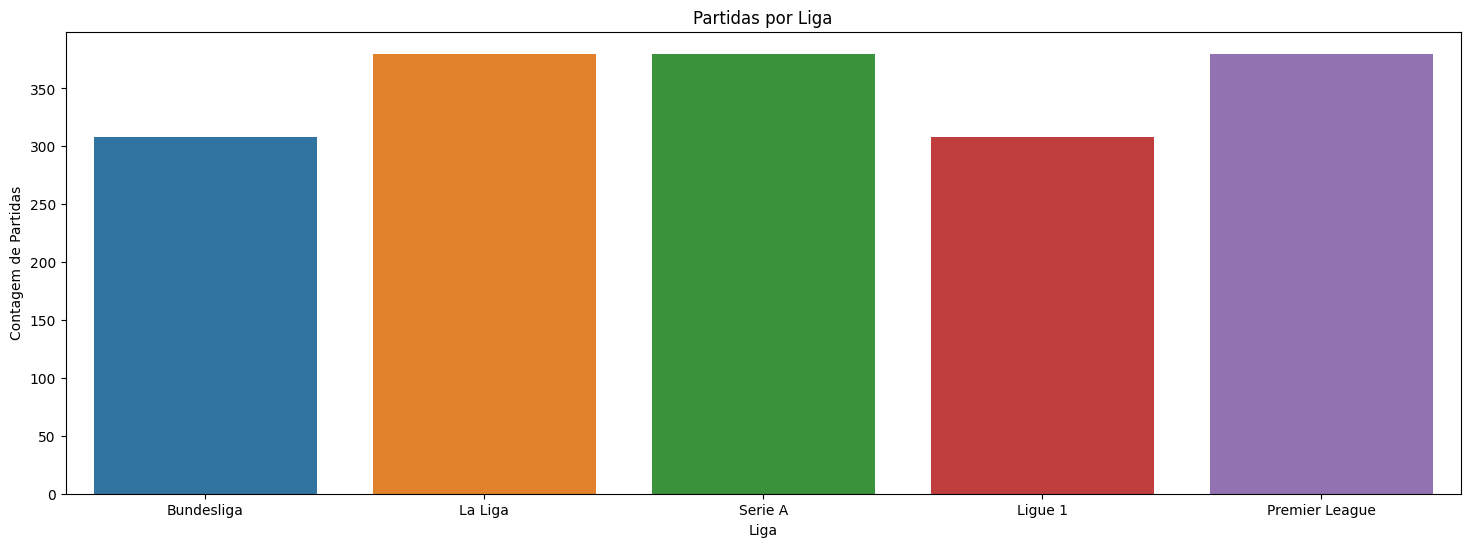

In [ ]:
# 2. Total de partidas por Liga

fig, ax = plt.subplots(figsize=(18,6))

sns.countplot(data=df, ax=ax, x='league.name', hue='league.name')
ax.set_title('Partidas por Liga')
ax.set_xlabel('Liga')
ax.set_ylabel('Contagem de Partidas')

fig.show()


Proporção de resultados (%) por liga:
winner             Empate  Vitória_Casa  Vitória_Visitante
league.name                                               
Bundesliga      26.298701     43.506494          30.194805
La Liga         28.157895     43.947368          27.894737
Ligue 1         26.623377     39.285714          34.090909
Premier League  21.578947     46.052632          32.368421
Serie A         25.789474     46.842105          27.368421


<Figure size 1200x600 with 0 Axes>

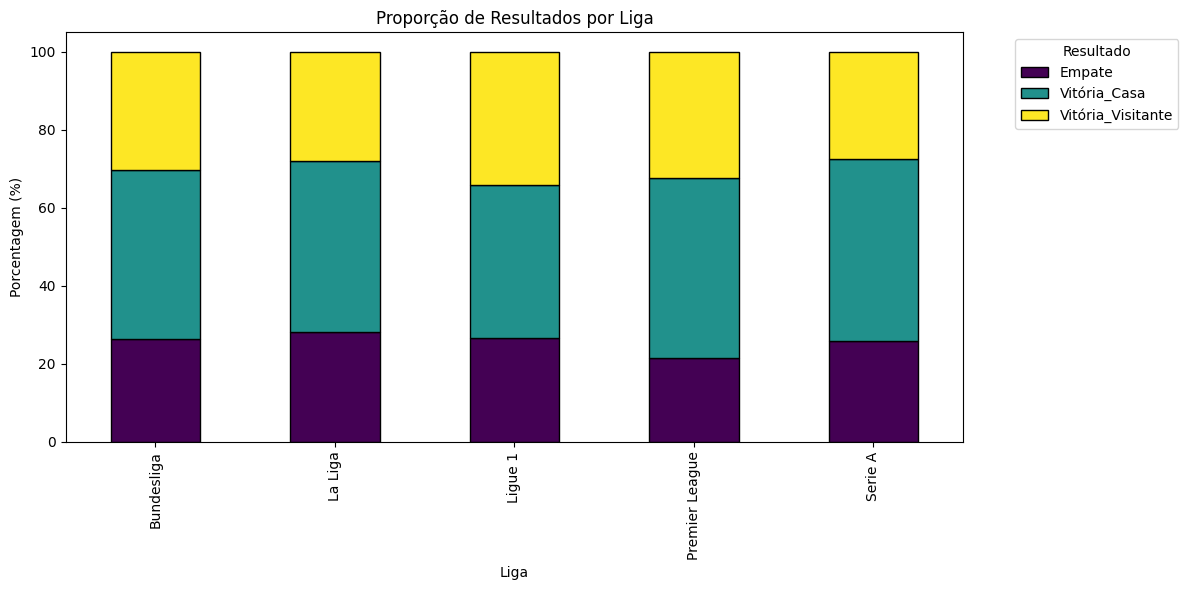

In [10]:
# 3. Análise de Resultados (Proporção de Vitórias)

cross_tab = pd.crosstab(df['league.name'], df['winner'], normalize='index') * 100

print("\nProporção de resultados (%) por liga:")
print(cross_tab)

plt.figure(figsize=(12,6))
cross_tab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis', edgecolor='black')
plt.title("Proporção de Resultados por Liga")
plt.xlabel("Liga")
plt.ylabel("Porcentagem (%)")
plt.legend(title="Resultado", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

Text(0, 0.5, 'Total de Gols na Partida')

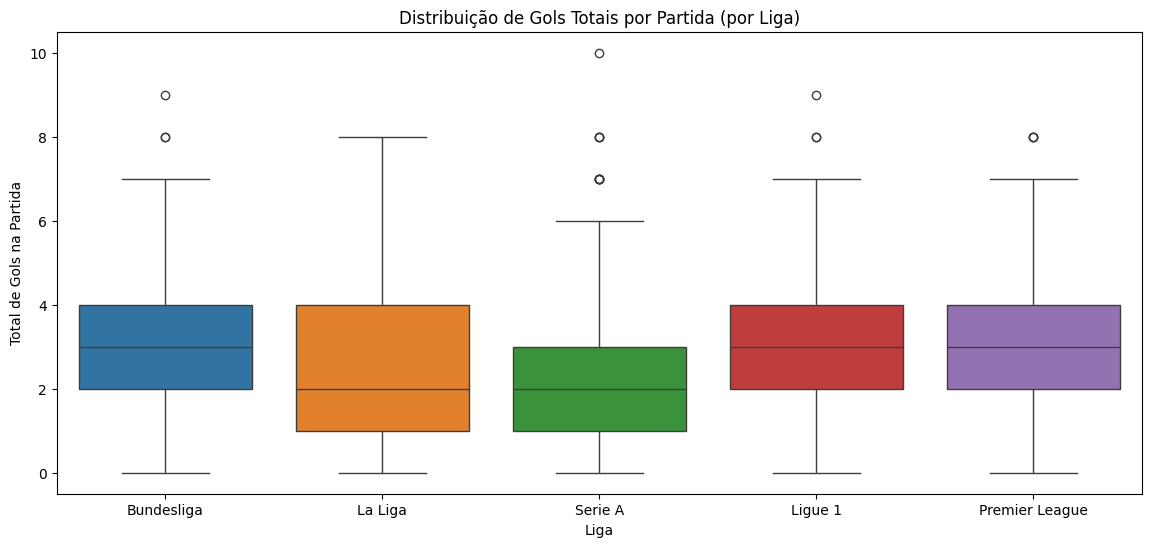

In [13]:
# 4. Visualização da Distribuição de Gols Totais por Liga

df["goals.total"] = df["goals.home"] + df["goals.away"]

plt.figure(figsize=(14,6))
sns.boxplot(x='league.name', y='goals.total', data=df, hue='league.name')
plt.title("Distribuição de Gols Totais por Partida (por Liga)")
plt.xlabel('Liga')
plt.ylabel('Total de Gols na Partida')

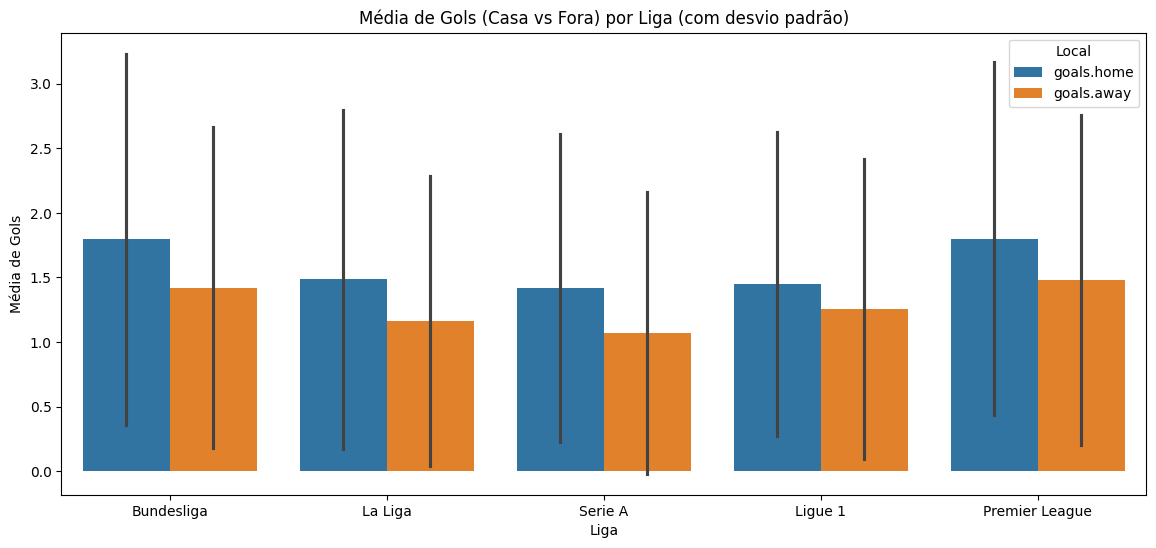

In [15]:
# 5. Visualização da Média de Gols (Casa vs Fora) por Liga

df_melted = df.melt(id_vars=['league.name'], value_vars=['goals.home', 'goals.away'], var_name='Local', value_name='Gols')

plt.figure(figsize=(14,6))
sns.barplot(x='league.name', y='Gols', hue='Local', data=df_melted, errorbar='sd')
plt.title('Média de Gols (Casa vs Fora) por Liga (com desvio padrão)')
plt.xlabel('Liga')
plt.ylabel('Média de Gols')
plt.legend(title='Local')